In [1]:
def convert_rgb_to_gray_level(im_1):
    m=im_1.shape[0]
    n=im_1.shape[1]
    im_2=np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            im_2[i,j]=get_distance(im_1[i,j,:])
    return im_2
def get_distance(v,w=[1/3,1/3,1/3]):
    a,b,c=v[0],v[1],v[2]
    w1,w2,w3=w[0],w[1],w[2]
    d=((a**2)*w1+(b**2)*w2+(c**2)*w3)**.5
    return d
def get_default_mask_for_mean():
    return np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3)/9
def apply_mask(part_of_image):
    mask=get_default_mask_for_mean()
    return sum(sum(part_of_image*mask))

(<matplotlib.axes._subplots.AxesSubplot at 0x209f7f16730>,
 <matplotlib.image.AxesImage at 0x209fa9525b0>)

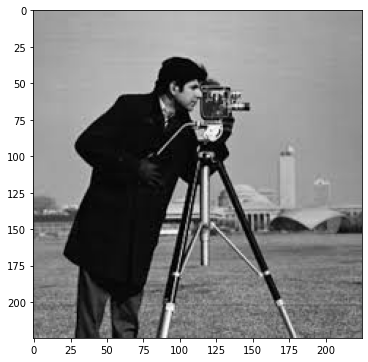

In [5]:
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
im_1=mpimg.imread('cameraman.jpg')
im_2=convert_rgb_to_gray_level(im_1)
%matplotlib inline
plt.figure(figsize=(20,20))
plt.subplot(1,3,1),plt.imshow(im_1)

In [18]:
def get_median_for_55(poi):
    s_1=poi.reshape(1,25)
    s_1.sort()
    return s_1[0,13]
def get_median(poi):
    s_1=poi.reshape(1,9)
    s_1.sort()
    return s_1[0,4]
def get_mean_filter_for_55(im_1):
    m=im_1.shape[0]
    n=im_1.shape[1]
    im_2=np.zeros((m,n))
    for i in range(3,m-3):
        for j in range(3,n-3):
            poi=im_1[i-2:i+3,j-2:j+3]
            im_2[i,j]=get_median_for_55(poi)
    return im_2
def get_mean_filter(im_1):
    m=im_1.shape[0]
    n=im_1.shape[1]
    im_2=np.zeros((m,n))
    for i in range(1,m-1):
        for j in range(1,n-1):
            poi=im_1[i-1:i+2,j-1:j+2]
            im_2[i,j]=get_median(poi)
    return im_2

In [19]:
i,j=10,10
poi_100=im_1[i-2:i+3,j-2:j+3]
poi_100.shape

(5, 5, 3)

In [20]:
i,j=10,10
poi_100=im_2[i-2:i+3,j-2:j+3]
poi_100.shape

(5, 5)

In [21]:
apply_mask(im_2[1:4,1:4])

156.66666666666666

In [22]:
im_55=get_mean_filter_for_55(im_2)

(<matplotlib.axes._subplots.AxesSubplot at 0x209fa89ccd0>,
 <matplotlib.image.AxesImage at 0x209faa36dc0>)

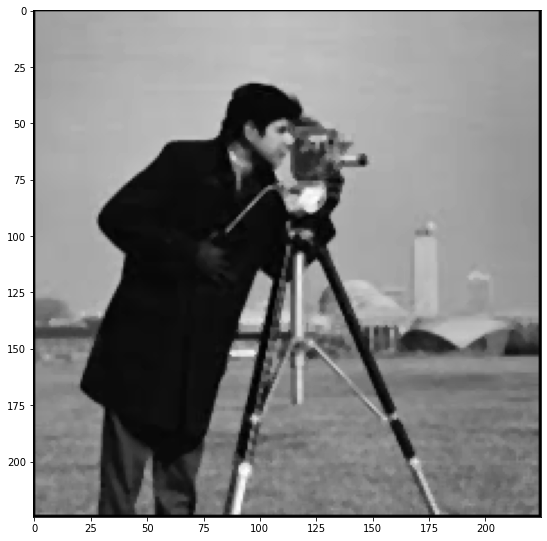

In [25]:
im_555=get_mean_filter(im_2)
plt.figure(figsize=(20,20))
plt.subplot(1,2,2),plt.imshow(im_555,cmap="gray")

(<matplotlib.axes._subplots.AxesSubplot at 0x209fab04160>,
 <matplotlib.image.AxesImage at 0x209fadd4940>)

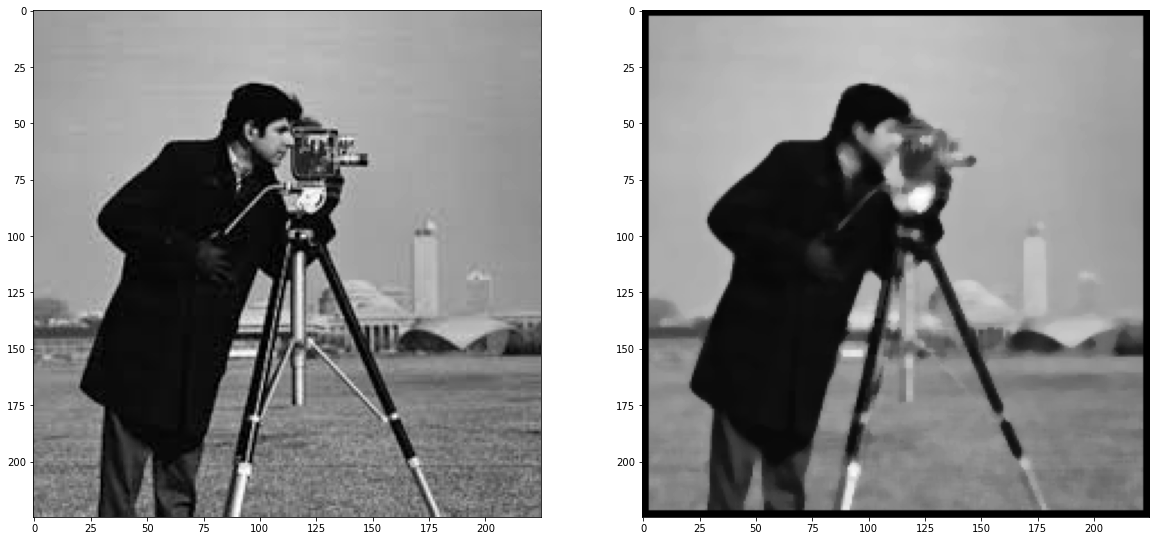

In [23]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1),plt.imshow(im_2,cmap="gray")
plt.subplot(1,2,2),plt.imshow(im_55,cmap="gray")